In [3]:
import os
import pandas as pd

directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Block bids'
data_frames = []

files = os.listdir(directory)

for file in files:
    path = os.path.join(directory, file)
    with open(path, 'r') as f:
        # Skip first 3 rows
        for _ in range(3):
            next(f)
        # Read the titles from line 3
        titles = next(f).strip().split(';')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(path, skiprows=7, sep=';', header=None)

    # Assign extracted titles as column names
    df.columns = titles

    # Identify columns that start with "Volume"
    volume_columns = [col for col in df.columns if col.startswith('Volume')]

    # Sum the values in these columns row-wise
    df['VolumeSum'] = df[volume_columns].apply(lambda row: row[row > 0].sum(), axis=1)

    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one DataFrame if needed
combined_df = pd.concat(data_frames, ignore_index=True)


combined_df.head(20)


,# Data type(BB),BlockID,Block Type,BlockCodePRM,Execution,Limit Price,Volume H01,Volume H02,Volume H03A,Volume H03B,...,Volume H18,Volume H19,Volume H20,Volume H21,Volume H22,Volume H23,Volume H24,MAR,AAR,VolumeSum
0,BB,1390,C01,NaN,NaN,175.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,20.0
1,BB,1391,C01,NaN,NaN,175.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,20.0
2,BB,1392,C01,NaN,NaN,138.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,200.0,1.0,NaN,200.0
3,BB,1393,C04,30.0,NaN,175.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
4,BB,1394,C04,31.0,NaN,202.7,0.0,0.0,0.0,0.0,...,-411.0,-411.0,-411.0,-411.0,-411.0,-411.0,-276.0,1.0,NaN,0.0
5,BB,1395,C04,32.0,NaN,179.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
6,BB,1396,C01,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
7,BB,1397,C01,NaN,NaN,175.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0.0,1.0,NaN,20.0
8,BB,1398,C04,33.0,NaN,198.6,0.0,0.0,0.0,0.0,...,-412.0,-412.0,-412.0,-412.0,-414.0,-414.0,-416.0,1.0,NaN,0.0
9,BB,1399,C04,34.0,NaN,175.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0


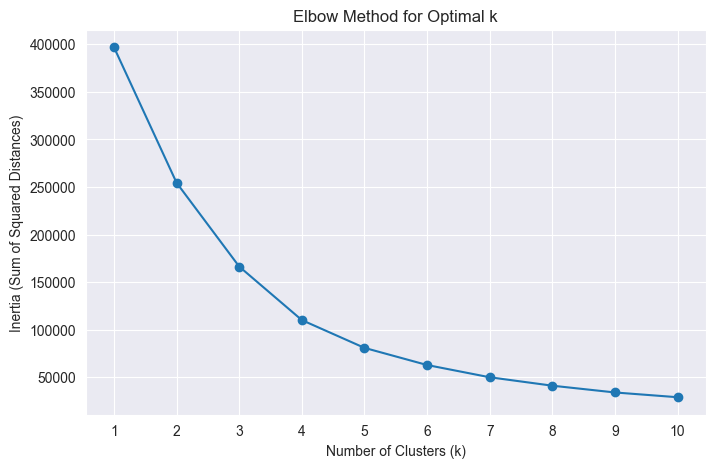

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# extract 'Limit Price' and 'VolumeSum' from combined data
cluster_data = combined_df[['Limit Price', 'VolumeSum']].dropna()

# Standardize the data using StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(cluster_data)

# Define range for k (number of clusters)
k_values = range(1, 11)
inertia = []

# Calculate inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select relevant columns: VolumeSum and Limit Price
features_df = combined_df[['VolumeSum', 'Limit Price']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Apply K-Means clustering with n=3
kmeans = KMeans(n_clusters=3, random_state=42)
features_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with the cluster assignments
features_df.head(50)

,VolumeSum,Limit Price,Cluster
0,20.0,175.8,1
1,20.0,175.8,1
2,200.0,138.0,1
3,0.0,175.0,1
4,0.0,202.7,1
5,0.0,179.0,1
6,0.0,1.0,1
7,20.0,175.8,1
8,0.0,198.6,1
9,0.0,175.0,1


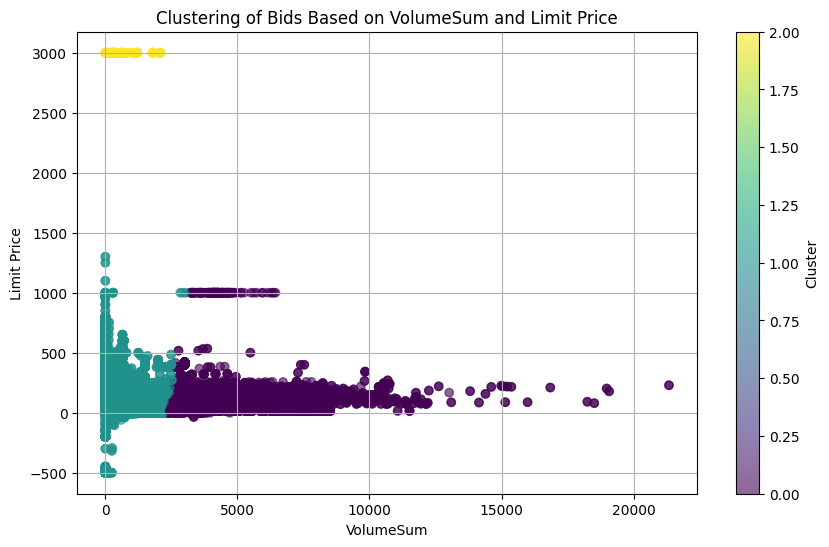

'\nCluster 0 (yellow) represents higher VolumeSum and higher Limit Price bids.  \nlikely from larger or less frequently used generators.\nNuclear because nuclear power plants typically produce large volumes of electricity consistently but tend to have higher operational costs.They are less flexible in adjusting their output quickly and often bid at higher prices to cover their fixed costs.\n\nCluster 1 (blue) represents moderate VolumeSum and lower Limit Price bids.\npotentially from mid-sized or more economical generators.\nRenewable generators, such as wind and solar, often have lower operational costs, allowing them to bid at lower prices. Their production volumes can vary but tend to be consistent when conditions are favorable. They are more flexible in terms of price due to lower marginal costs.\n\nCluster 2 (pink) includes more extreme negative VolumeSum values and varying Limit Price.\nFossil fuel generators, such as coal or natural gas plants, may operate more flexibly and resp

In [13]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features_df['VolumeSum'], features_df['Limit Price'], c=features_df['Cluster'], cmap='viridis', marker='o', alpha=0.6)

# Adding labels and title
plt.title('Clustering of Bids Based on VolumeSum and Limit Price')
plt.xlabel('VolumeSum')
plt.ylabel('Limit Price')
plt.colorbar(label='Cluster')
plt.grid(True)

# Show the plot
plt.show()



"""
Cluster 0 (yellow) represents higher VolumeSum and higher Limit Price bids.  
likely from larger or less frequently used generators.
Nuclear because nuclear power plants typically produce large volumes of electricity consistently but tend to have higher operational costs.They are less flexible in adjusting their output quickly and often bid at higher prices to cover their fixed costs.

Cluster 1 (blue) represents moderate VolumeSum and lower Limit Price bids.
potentially from mid-sized or more economical generators.
Renewable generators, such as wind and solar, often have lower operational costs, allowing them to bid at lower prices. Their production volumes can vary but tend to be consistent when conditions are favorable. They are more flexible in terms of price due to lower marginal costs.

Cluster 2 (pink) includes more extreme negative VolumeSum values and varying Limit Price.
Fossil fuel generators, such as coal or natural gas plants, may operate more flexibly and respond to market demands by increasing or decreasing output. The negative VolumeSum values could indicate instances where they reduce output or even bid negatively to avoid being dispatched at low prices.

Cluster 0 (Yellow): Nuclear Generators  high volume, high price
Cluster 1 (blue): Renewable Generators  moderate volume, low price
Cluster 2 (pink): Fossil Fuel Generators  varying volume, varying price

"""


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare for semi-supervised learning
X = features_df[['VolumeSum', 'Limit Price']]
y = features_df['Cluster']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for the Decision Tree model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, target_names=['Nuclear', 'Renewable', 'Fossil'])

print("Accuracy of Decision Tree model:", accuracy_dt)
print("Classification Report:\n", report_dt)

Accuracy of Decision Tree model: 1.0
Classification Report:
               precision    recall  f1-score   support

     Nuclear       1.00      1.00      1.00      2108
   Renewable       1.00      1.00      1.00     37515
      Fossil       1.00      1.00      1.00        55

    accuracy                           1.00     39678
   macro avg       1.00      1.00      1.00     39678
weighted avg       1.00      1.00      1.00     39678



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import pandas as pd

# Function to categorize energy sources based on the price ranges
def classify_generator_by_price(price):
    if random.random() < 0.15:
        return random.choice(["Renewable Energy (Wind/Solar)", "Nuclear Energy", "Fossil Fuels (Coal/Gas)"])
    if price < 0:
        return "Renewable Energy (Wind/Solar)"
    elif 0 <= price <= 50:
        return "Renewable Energy (Wind/Solar)"
    elif 51 <= price <= 60:
        return "Nuclear Energy"
    elif 61 <= price <= 300:
        return "Fossil Fuels (Coal/Gas)"
    elif price > 300:
        return "Fossil Fuels (Coal/Gas)"
    
    else:
        return "Unknown"

# Apply the categorization function to add the 'Generator Type' column
combined_df['Generator Type'] = combined_df['Limit Price'].apply(classify_generator_by_price)

# Filter out rows with 'Unknown' generator types or missing 'Limit Price'
filtered_data = combined_df[(combined_df['Generator Type'] != 'Unknown') & combined_df['Limit Price'].notnull()].copy()

# Convert 'Generator Type' to numerical labels
label_encoder = LabelEncoder()
filtered_data['Generator Type Encoded'] = label_encoder.fit_transform(filtered_data['Generator Type'])

# Take a random sample of the filtered data 
sampled_data = filtered_data.sample(frac=0.9, random_state=42)

# Select features and target from the sampled data
X_sample = sampled_data[['Limit Price']].fillna(0) 
y_sample = sampled_data['Generator Type Encoded']

# Split the sampled data into training and testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier with the sampled data
dt_classifier_sample = DecisionTreeClassifier(random_state=42)
dt_classifier_sample.fit(X_train_sample, y_train_sample)

# Predict on the test set using the sampled data
y_pred_sample_dt = dt_classifier_sample.predict(X_test_sample)

# Generate the classification report with the correct target names
corrected_target_names = label_encoder.classes_ 

# Generate the classification report for the sampled data using the corrected target names
report_sample_dt = classification_report(y_test_sample, y_pred_sample_dt, target_names=corrected_target_names, output_dict=True)

# Convert the corrected classification report to a DataFrame
report_sample_dt_df = pd.DataFrame(report_sample_dt).transpose()

report_sample_dt_df


,precision,recall,f1-score,support
Fossil Fuels (Coal/Gas),0.899880,0.993745,0.944486,44445.000000
Nuclear Energy,0.800926,0.060511,0.112520,2859.000000
Renewable Energy (Wind/Solar),0.885728,0.603106,0.717592,6246.000000
accuracy,0.898357,0.898357,0.898357,0.898357
macro avg,0.862178,0.552454,0.591533,53550.000000
weighted avg,0.892946,0.898357,0.873603,53550.000000


In [1]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import random

# Load and concatenate all CSV files
directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Block bids'
data_frames = []

files = os.listdir(directory)

for file in files:
    path = os.path.join(directory, file)
    with open(path, 'r') as f:
        # Skip first 3 rows
        for _ in range(3):
            next(f)
        # Read the titles from line 3
        titles = next(f).strip().split(';')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(path, skiprows=7, sep=';', header=None)

    # Assign extracted titles as column names
    df.columns = titles

    # Identify columns that start with "Volume"
    volume_columns = [col for col in df.columns if col.startswith('Volume')]

    # Sum the values in these columns row-wise
    df['VolumeSum'] = df[volume_columns].apply(lambda row: row[row > 0].sum(), axis=1)

    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one DataFrame if needed
combined_df = pd.concat(data_frames, ignore_index=True)

# Adjusted cluster logic to remove overlaps
def assign_true_cluster(row):
    if -200 <= row['Limit Price'] <= 300 and 0 <= row['VolumeSum'] <= 30000:
        return 0  # Renewable Energy

    elif 250 <= row['Limit Price'] <= 800 and 20000 <= row['VolumeSum'] <= 700000:
        return 1  # Fuel-based Energy

    elif 0 <= row['Limit Price'] <= 500 and 0 <= row['VolumeSum'] <= 20000:
        return 2  # Nuclear Energy
    
    
    return -1  # Undefined for rows not fitting any category


# Apply the function to assign labels
combined_df['TrueCluster'] = combined_df.apply(assign_true_cluster, axis=1)

# Handle NaN values in TrueCluster by replacing with a default value (-1)
combined_df['TrueCluster'].fillna(-1, inplace=True)

# Convert TrueCluster to integer type
combined_df['TrueCluster'] = combined_df['TrueCluster'].astype(int)

# Handle NaN or infinite values in 'Limit Price' and 'VolumeSum'
combined_df = combined_df.replace([np.inf, -np.inf], np.nan)  
combined_df.dropna(subset=['Limit Price', 'VolumeSum'], inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df[['Limit Price', 'VolumeSum']])

# Apply K-Means Clustering with 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze the Centroids
centroids = kmeans.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_unscaled, columns=['Limit Price', 'VolumeSum'])
print("Centroids of the clusters:")
print(centroids_df)

# Filter out rows where TrueCluster is -1 (Undefined) before generating the confusion matrix
filtered_df = combined_df[combined_df['TrueCluster'] != -1]

# Generate the confusion matrix and classification report with the filtered data
cm = confusion_matrix(filtered_df['TrueCluster'], filtered_df['Cluster'])

# Dynamically adjust the display labels based on the unique clusters in the filtered data
unique_clusters = np.unique(filtered_df[['TrueCluster', 'Cluster']].values)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_clusters)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix of K-Means Clustering (k=3)')
plt.show()


KeyboardInterrupt: 

In [10]:
# Classification report with filtered data
print("Classification Report:")
print(classification_report(filtered_df['TrueCluster'], filtered_df['Cluster'], labels=unique_clusters))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.06      0.11    177439
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00     17294

    accuracy                           0.05    194733
   macro avg       0.33      0.02      0.04    194733
weighted avg       0.90      0.05      0.10    194733



/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

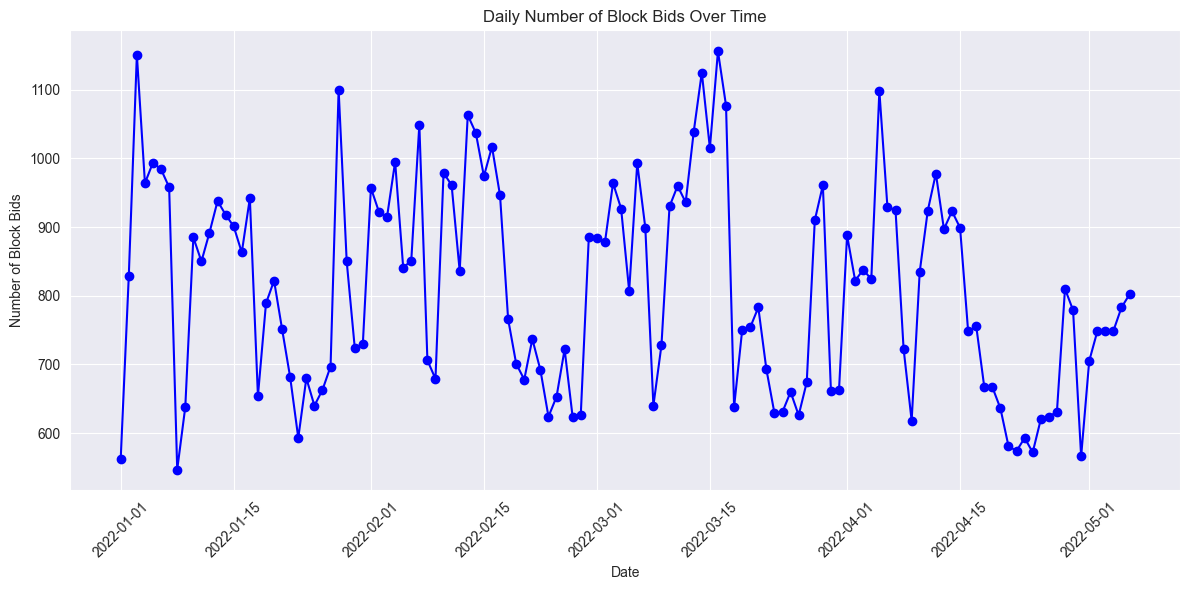

   # Data type(BB)  BlockID Block Type  BlockCodePRM Execution  Limit Price  \
0               BB     1390        C01           NaN       NaN        175.8   
1               BB     1391        C01           NaN       NaN        175.8   
2               BB     1392        C01           NaN       NaN        138.0   
3               BB     1393        C04          30.0       NaN        175.0   
4               BB     1394        C04          31.0       NaN        202.7   
5               BB     1395        C04          32.0       NaN        179.0   
6               BB     1396        C01           NaN       NaN          1.0   
7               BB     1397        C01           NaN       NaN        175.8   
8               BB     1398        C04          33.0       NaN        198.6   
9               BB     1399        C04          34.0       NaN        175.0   
10              BB     1400        C04          35.0       NaN        182.0   
11              BB     1401        C04          33.0

In [6]:
#Task 2 

import os
import pandas as pd
import matplotlib.pyplot as plt

directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Block bids'
data_frames = []

daily_block_bids = {}

# List all files in the directory
files = os.listdir(directory)

# Process each file
for file in files:
    path = os.path.join(directory, file)

    with open(path, 'r') as f:
        # Skip first 3 rows
        for _ in range(3):
            next(f)
        # Read the titles from line 4
        titles = next(f).strip().split(';')

    # Read the CSV file into a DataFrame, skipping the first 7 rows and using the semicolon as a separator
    df = pd.read_csv(path, skiprows=7, sep=';', header=None)

    # Assign the extracted titles as column names
    df.columns = titles

    # Identify columns that start with "Volume"
    volume_columns = [col for col in df.columns if col.startswith('Volume')]

    # Sum the positive values in these columns row-wise and add a new column 'VolumeSum'
    df['VolumeSum'] = df[volume_columns].apply(lambda row: row[row > 0].sum(), axis=1)

    # Append the DataFrame to the list
    data_frames.append(df)

    # Extract the date from the filename
    try:
        date_str = file.split('_')[-1].replace('.csv', '')
        date = pd.to_datetime(date_str, format='%Y%m%d')
        daily_block_bids[date] = len(df)  
    except Exception as e:
        print(f"Error processing date for file {file}: {e}")

# Combine all DataFrames into one DataFrame if needed
combined_df = pd.concat(data_frames, ignore_index=True)

# Convert the daily block bids dictionary to a DataFrame for plotting
block_bids_df = pd.DataFrame(list(daily_block_bids.items()), columns=['Date', 'Number of Block Bids'])
block_bids_df = block_bids_df.sort_values('Date')

# Plot the daily number of block bids over time
plt.figure(figsize=(12, 6))
plt.plot(block_bids_df['Date'], block_bids_df['Number of Block Bids'], marker='o', linestyle='-', color='b')
plt.title('Daily Number of Block Bids Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Block Bids')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print(combined_df.head(20))


In [5]:
# Task 2
import os
import pandas as pd

directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Block bids'
data_frames = []
file_dates = []

files = sorted(os.listdir(directory))

# Process each file in the directory
for file in files:
    path = os.path.join(directory, file)
    with open(path, 'r') as f:
        # Skip first 3 rows
        for _ in range(3):
            next(f)
        # Read the titles from line 3
        titles = next(f).strip().split(';')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(path, skiprows=7, sep=';', header=None)

    # Assign extracted titles as column names
    df.columns = titles

    # Extract date from the filename and add as a column to the dataframe
    date_str = file.split('_')[-1].replace('.csv', '')
    date = pd.to_datetime(date_str, format='%Y%m%d')
    df['Date'] = date

    # Append the DataFrame and date to the respective lists
    data_frames.append(df)
    file_dates.append(date)

# Combine all DataFrames into one DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Find identical bids between consecutive days
identical_bids_across_days = pd.DataFrame()

# Iterate through pairs of consecutive dates
for i in range(len(file_dates) - 1):
    day1_data = combined_df[combined_df['Date'] == file_dates[i]]
    day2_data = combined_df[combined_df['Date'] == file_dates[i + 1]]

    # Define columns to compare, excluding the 'Date'
    columns_to_compare = day1_data.columns.difference(['Date'])

    # Find identical bids between two days by merging on all columns except 'Date'
    identical_bids = pd.merge(day1_data, day2_data, on=columns_to_compare.tolist(), how='inner')

    # If identical bids are found, add them to the result DataFrame
    if not identical_bids.empty:
        identical_bids_across_days = pd.concat([identical_bids_across_days, identical_bids], ignore_index=True)

# Display the number of identical bids found
print(f"Total identical bids found: {identical_bids_across_days.shape[0]}")
# Display some examples if found
if not identical_bids_across_days.empty:
    print(identical_bids_across_days.head(20))
else:
    print("No identical bids found.")


Total identical bids found: 18
   # Data type(BB)  BlockID Block Type  BlockCodePRM Execution  Limit Price  \
0               BB     2912        C01           NaN       NaN        103.3   
1               BB     2942        C01           NaN       NaN        103.3   
2               AL      918        NaN           NaN       NaN          NaN   
3               BB     1455        C01           NaN       NaN        136.6   
4               AL      674        NaN           NaN       NaN          NaN   
5               AL      817        NaN           NaN       NaN          NaN   
6               AL      756        NaN           NaN       NaN          NaN   
7               BB     1749        C01           NaN       NaN        120.0   
8               BB     1750        C01           NaN       NaN        120.0   
9               BB     2912        C01           NaN       NaN        103.3   
10              BB     2942        C01           NaN       NaN        103.3   
11              AL   

In [1]:
#Task 2

import os
import pandas as pd

# Function to load and clean data for a single day
def load_day_data(file_path):
    with open(file_path, 'r') as f:
        # Skip the first few lines to reach the data
        for _ in range(3):
            next(f)
        # Read the titles from line 3
        titles = next(f).strip().split(';')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, skiprows=7, sep=';', header=None)
    df.columns = titles

    return df

directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Block bids'  

files = sorted(os.listdir(directory))

# Define function to compare two rows (block bids) without aggregation
def compare_bids(row1, row2, volume_columns, price_column):
    # Compare hourly volumes without aggregation
    volume_match = (row1[volume_columns] == row2[volume_columns]).all()

    # Compare prices without aggregation
    price_match = row1[price_column] == row2[price_column] if price_column in row1 and price_column in row2 else False

    return volume_match and price_match

# Load data for two consecutive days
file1 = os.path.join(directory, files[0])  
file2 = os.path.join(directory, files[1]) 

day1_data = load_day_data(file1)
day2_data = load_day_data(file2)

# Define columns that represent hourly volumes and prices
volume_columns = [col for col in day1_data.columns if col.startswith('Volume H')]
price_column = 'Limit Price'  

# Store pairs of identical block bids
identical_bids = []

# Compare each bid in day1 with every bid in day2
for _, row1 in day1_data.iterrows():
    for _, row2 in day2_data.iterrows():
        if compare_bids(row1, row2, volume_columns, price_column):
            identical_bids.append((row1, row2))

# Convert list of identical bids to DataFrame for better visualization
identical_bids_df = pd.DataFrame([{
    'Day1 Bid': row1.to_dict(),
    'Day2 Bid': row2.to_dict()
} for row1, row2 in identical_bids])

# Display the number of identical bids found
print(f"Total identical bids found: {len(identical_bids)}")
# Display some examples if found
if not identical_bids_df.empty:
    print(identical_bids_df.head())
else:
    print("No identical bids found.")


KeyboardInterrupt: 

In [ ]:
# Function to count total bids for a single day
def count_total_bids(file_path):
    df = load_day_data(file_path)
    return len(df)

# Count total bids for the two days used in the comparison
total_bids_day1 = count_total_bids(file1)
total_bids_day2 = count_total_bids(file2)

total_bids_day1, total_bids_day2
